# ***MNIST Example***

In [1]:
%pip install numpy matplotlib idx2numpy

In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import numpy.linalg as inv

In [3]:
X_train = idx2numpy.convert_from_file('./dataset/train-images-idx3-ubyte')
X_test = idx2numpy.convert_from_file('./dataset/t10k-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file('./dataset/train-labels-idx1-ubyte')
y_test = idx2numpy.convert_from_file('./dataset/t10k-labels-idx1-ubyte')

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


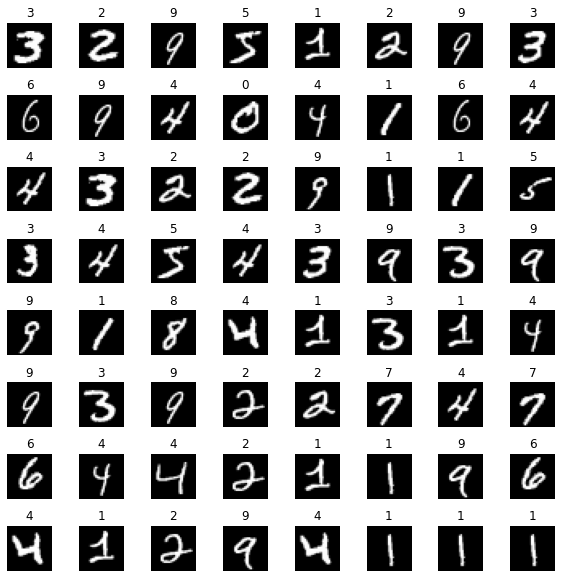

In [5]:
l, m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [6]:
class NeuralNetwork:
    def __init__(self, X_train, X_test, y_train, y_test, ** layers):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.layers = list(layers.items())
        self.Weights = []
        self.Biases = []
        for index, layer in enumerate(self.layers):
            if index == 0:
                self.Weights.append(np.random.rand(self.X_train.shape[1] * self.X_train.shape[2], layer[1].neurons))
            else:
                self.Weights.append(np.random.rand(self.layers[index - 1][1].neurons, layer[1].neurons,))
            self.Biases.append(np.random.rand(1, layer[1].neurons))

    def parameters(self):
        n_weights = 0
        for i in self.Biases:
            n_weights += i.shape[1]

        for i in self.Weights:
            n_weights += i.shape[0] * i.shape[1]

        print('total parameters in your model', n_weights)

    def dense(self, A_in, W, B, activation):
        Z = np.matmul(A_in, W) + B
        A_out = activation(Z)
        return A_out
    
    def relu(self, z):
        return max(0, z)

    def softmax(self):
        pass

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forwardPropagation(self):
        pass

    def backwardPropagation(self):
        pass

    def fit(self, iterations):
        pass

    def testModel(self):
        pass

In [7]:
class Layer:
    def __init__(self, neurons, activation):
        self.neurons = neurons
        self.activation = activation

In [8]:
neural_network = NeuralNetwork(
    X_train = X_train,
    X_test = X_test,
    y_test = y_test,
    y_train = y_test,
    layer1 = Layer(25, 'relu'),
    layer2 = Layer(15, 'relu'),
    layer3 = Layer(10, 'softmax')
)

neural_network.parameters()
for i in range(len(neural_network.layers)):
    print(neural_network.Weights[i].shape)
    print(neural_network.Biases[i].shape)


total parameters in your model 20175
(784, 25)
(1, 25)
(25, 15)
(1, 15)
(15, 10)
(1, 10)


In [9]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = neural_network.dense(X_tst, W_tst, b_tst, neural_network.sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
